In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# !pip install pandas-datareader

In [5]:
# fetch data from yahoo finance 
gold = pdr.get_data_yahoo('GLD', '2016-11-08') # this is the starting date
gold.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-07,122.709999,121.879997,122.660004,122.150002,10015000,122.150002
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998
2016-11-14,117.139999,115.489998,116.120003,116.110001,20729400,116.110001
2016-11-15,117.239998,116.290001,116.459999,117.120003,9348600,117.120003
2016-11-16,117.269997,116.580002,117.269997,116.769997,5486100,116.769997
2016-11-17,117.220001,115.440002,116.910004,116.169998,10342300,116.169998


In [24]:
# we will only consider the closing price for now
gold_close = pd.DataFrame(gold.Close)

In [25]:
gold_close.head()

,Close
Date,
2016-11-07,122.150002
2016-11-08,121.639999
2016-11-09,121.559998
2016-11-10,119.750000
2016-11-11,117.099998


In [26]:
# it contains the data up to current date.
gold_close.tail()

,Close
Date,
2020-11-04,178.820007
2020-11-05,182.929993
2020-11-06,183.190002
2020-11-09,175.080002
2020-11-10,176.830002


In [27]:
gold_close.shape

(1010, 1)

In [33]:
# using rolling method to compute moving averages

gold_close['MA_9'] = gold_close['Close'].rolling(9).mean() # creating new column with the mean of the values in the previous 9 days window
gold_close['MA_21'] = gold_close['Close'].rolling(21, center = True).mean()

In [29]:
gold_close.head(10)

,Close,MA_9,MA_21
Date,,,
2016-11-07,122.150002,NaN,NaN
2016-11-08,121.639999,NaN,NaN
2016-11-09,121.559998,NaN,NaN
2016-11-10,119.750000,NaN,NaN
2016-11-11,117.099998,NaN,NaN
2016-11-14,116.110001,NaN,NaN
2016-11-15,117.120003,NaN,NaN
2016-11-16,116.769997,NaN,NaN
2016-11-17,116.169998,118.707777,NaN


In [19]:
# for the first set of 9 days, we will be observing nan values because of the unavailability of the previous 9 days records
# for MA_9 the 10th record will contain the average of the previous 9 days closing prices.

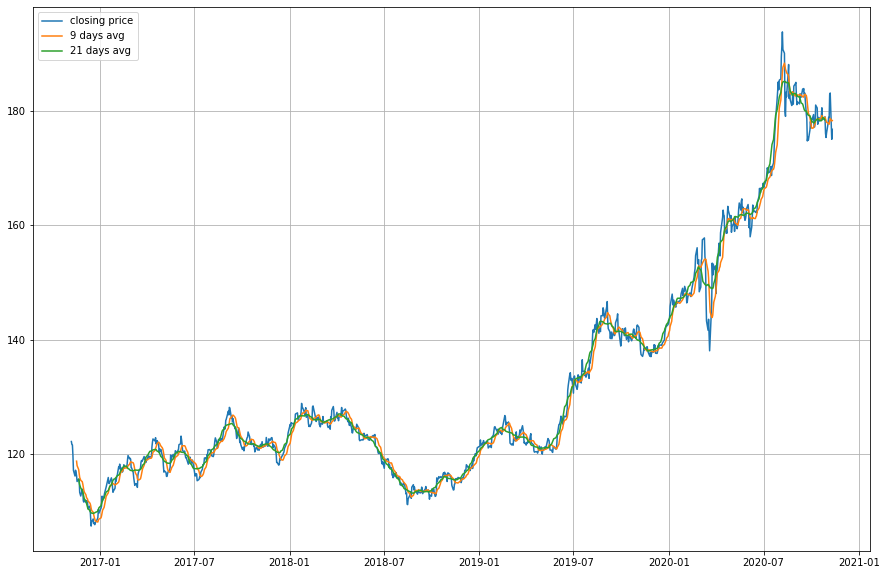

In [20]:
# lets plot the data and moving averages

plt.figure(figsize = (15, 10))
plt.grid(True)

plt.plot(gold_close['Close'], label = 'closing price')
plt.plot(gold_close['MA_9'], label = '9 days avg')
plt.plot(gold_close['MA_21'], label = '21 days avg')

plt.legend(loc = 2)
plt.show()

In [21]:
# for obvious reasons 21 days moving average plot is smoother than the 9 days average.

In [38]:
# computing log change (instantaneous rate of return)

gold_close['change'] = np.log(gold_close['Close'] / gold_close['Close'].shift())

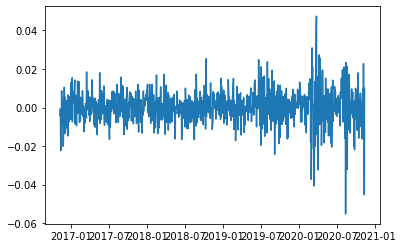

In [39]:
# we can notice this is very noisy
plt.plot(gold_close.change)

In [40]:
# compute the rolling historical volatility, offset
gold_close['Volatility'] = gold_close.change.rolling(21).std().shift() # otherwise it will be we know something we dont

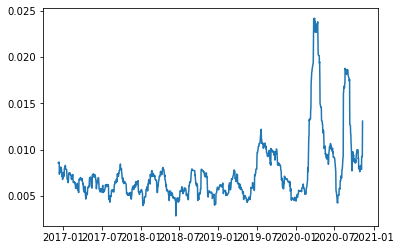

In [41]:
plt.plot(gold_close.Volatility)

In [42]:
# this is a cleaner version